In [8]:
# Generating some simple photon count data
import numpy as np
from scipy import stats
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

np.random.seed(1)  # for repeatability

F_true = 1000  # true flux, say number of photons measured in 1 second
N = 50 # number of measurements
F = stats.poisson(F_true).rvs(N)  # N measurements of the flux
e = np.sqrt(F)  # errors on Poisson counts estimated via square root

In [2]:
F

array([ 992,  962,  968,  991,  993,  970,  992,  961,  983, 1042,  947,
        966,  951, 1079, 1018, 1017,  979,  953, 1050,  980,  971,  999,
       1007, 1008,  953, 1018,  928, 1015, 1067, 1049,  961,  991, 1058,
       1024, 1044, 1024,  978,  993, 1015,  956,  995,  992, 1049,  984,
       1044, 1050,  966, 1060,  939, 1020])

In [3]:
e

array([ 31.4960315 ,  31.01612484,  31.11269837,  31.48015248,
        31.51190251,  31.144823  ,  31.4960315 ,  31.        ,
        31.35283081,  32.28002478,  30.77336511,  31.08054054,
        30.83828789,  32.84813541,  31.90611227,  31.89043744,
        31.28897569,  30.87069808,  32.40370349,  31.30495168,
        31.1608729 ,  31.60696126,  31.73326331,  31.74901573,
        30.87069808,  31.90611227,  30.46309242,  31.85906464,
        32.66496594,  32.38826948,  31.        ,  31.48015248,
        32.52691193,  32.        ,  32.31098884,  32.        ,
        31.27299154,  31.51190251,  31.85906464,  30.91924967,
        31.54362059,  31.4960315 ,  32.38826948,  31.36877428,
        32.31098884,  32.40370349,  31.08054054,  32.55764119,
        30.64310689,  31.93743885])

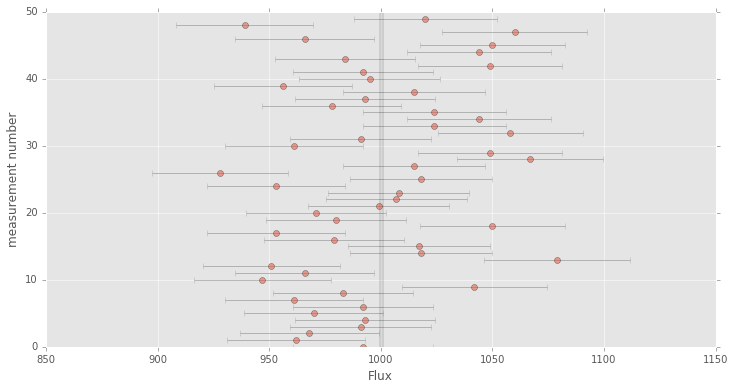

In [20]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='o', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.1)
ax.set_xlabel("Flux");
ax.set_ylabel("measurement number");

In [11]:
np.arange(N)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
[F_true]

[1000]

In [21]:
e

array([ 31.4960315 ,  31.01612484,  31.11269837,  31.48015248,
        31.51190251,  31.144823  ,  31.4960315 ,  31.        ,
        31.35283081,  32.28002478,  30.77336511,  31.08054054,
        30.83828789,  32.84813541,  31.90611227,  31.89043744,
        31.28897569,  30.87069808,  32.40370349,  31.30495168,
        31.1608729 ,  31.60696126,  31.73326331,  31.74901573,
        30.87069808,  31.90611227,  30.46309242,  31.85906464,
        32.66496594,  32.38826948,  31.        ,  31.48015248,
        32.52691193,  32.        ,  32.31098884,  32.        ,
        31.27299154,  31.51190251,  31.85906464,  30.91924967,
        31.54362059,  31.4960315 ,  32.38826948,  31.36877428,
        32.31098884,  32.40370349,  31.08054054,  32.55764119,
        30.64310689,  31.93743885])

In [24]:
w = 1. / e ** 2
w

array([ 0.00100806,  0.0010395 ,  0.00103306,  0.00100908,  0.00100705,
        0.00103093,  0.00100806,  0.00104058,  0.00101729,  0.00095969,
        0.00105597,  0.0010352 ,  0.00105152,  0.00092678,  0.00098232,
        0.00098328,  0.00102145,  0.00104932,  0.00095238,  0.00102041,
        0.00102987,  0.001001  ,  0.00099305,  0.00099206,  0.00104932,
        0.00098232,  0.00107759,  0.00098522,  0.00093721,  0.00095329,
        0.00104058,  0.00100908,  0.00094518,  0.00097656,  0.00095785,
        0.00097656,  0.00102249,  0.00100705,  0.00098522,  0.00104603,
        0.00100503,  0.00100806,  0.00095329,  0.00101626,  0.00095785,
        0.00095238,  0.0010352 ,  0.0009434 ,  0.00106496,  0.00098039])

In [30]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_true = 1000
      F_est  = 998 +/- 4 (based on 50 measurements)
      


In [31]:
def log_prior(theta):
    return 1  # flat prior

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

In [32]:
ndim = 1  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 1000  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# we'll start at random locations between 0 and 2000
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # discard burn-in points

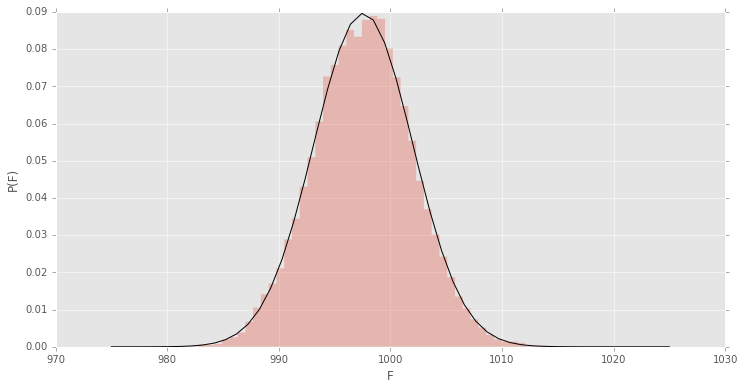

In [43]:
# plot a histogram of the sample
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, normed=True)

# plot a best-fit Gaussian
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); 
plt.ylabel("P(F)")

In [44]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, np.mean(sample), np.std(sample), N))


      F_true = 1000
      F_est  = 998 +/- 4 (based on 50 measurements)
      


In [45]:

np.random.seed(42)  # for reproducibility
N = 100  # we'll use more samples for the more complicated model
mu_true, sigma_true = 1000, 15  # stochastic flux model

F_true = stats.norm(mu_true, sigma_true).rvs(N)  # (unknown) true flux
F = stats.poisson(F_true).rvs()  # observed flux: true flux plus Poisson errors.
e = np.sqrt(F)  # root-N error, as above

In [47]:
def log_prior(theta):
    # sigma needs to be positive.
    if theta[1] <= 0:
        return -np.inf
    else:
        return 0

def log_posterior(theta, F, e):
    return log_prior(theta) + log_likelihood(theta, F, e)

# same setup as above:
ndim, nwalkers = 2, 50
nsteps, nburn = 2000, 1000

starting_guesses = np.random.rand(nwalkers, ndim)
starting_guesses[:, 0] *= 2000  # start mu between 0 and 2000
starting_guesses[:, 1] *= 20    # start sigma between 0 and 20

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].reshape(-1, 2)

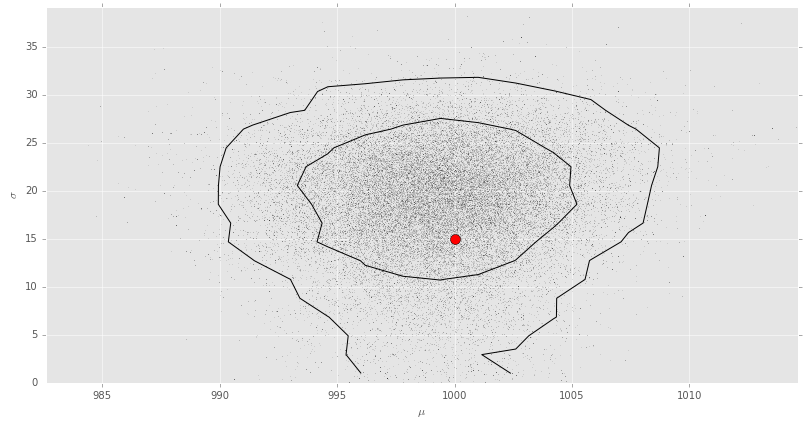

In [49]:
from astroML.plotting import plot_mcmc
fig = plt.figure()
ax = plot_mcmc(sample.T, fig=fig, labels=[r'$\mu$', r'$\sigma$'], colors='k')
ax[0].plot(sample[:, 0], sample[:, 1], ',k', alpha=0.1)
ax[0].plot([mu_true], [sigma_true], 'o', color='red', ms=10);